In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm

## Joint Gaussian Distribution

0.04121712306848293


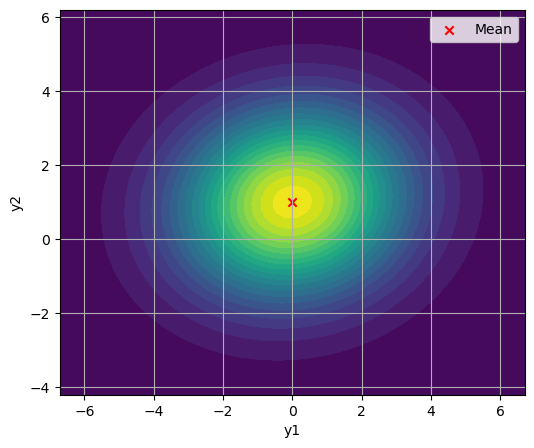

In [66]:
# Parameters
mu1, mu2 = 0.0, 1.0
Sigma11 = 5
Sigma12 = 0.3
Sigma21 = 0.3
Sigma22 = 3

mu = np.array([mu1, mu2])
Sigma = np.array([[Sigma11, Sigma12],
                 [Sigma21, Sigma22]])


y1_grid = np.linspace(mu1 - 3*np.sqrt(Sigma11), mu1 + 3*np.sqrt(Sigma11), 1000)
y2_grid = np.linspace(mu2 - 3*np.sqrt(Sigma22), mu2 + 3*np.sqrt(Sigma22), 1000)

num_samples = 500

Y1, Y2 = np.meshgrid(y1_grid, y2_grid)
pos = np.dstack((Y1, Y2))
rv = multivariate_normal(mu, Sigma)
tmp = rv.pdf(pos)
print(np.max(tmp))

# Plotting
plt.figure(figsize=(6, 5))
plt.contourf(Y1, Y2, rv.pdf(pos), levels = 20)
plt.xlabel('y1')
plt.ylabel('y2')
plt.scatter(mu1, mu2, color='red', marker='x', label='Mean')
plt.grid(True)
plt.legend()
plt.show()


## Marginal and Conditional

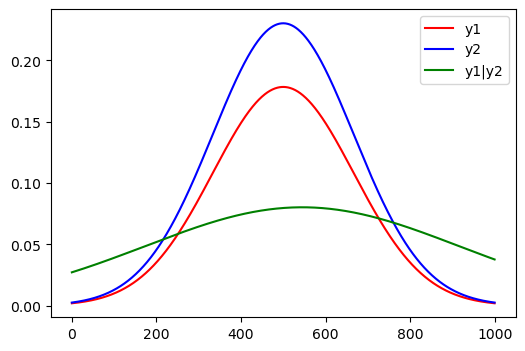

In [ ]:
# Choose y2_observation
y2_obs = 7.0

mu1_given2 = mu1 + Sigma12/Sigma22 * (y2_obs - mu2)
Sigma1_given2 = Sigma11- Sigma12/Sigma22 * Sigma21

plt.figure(figsize=(6, 4))

# Marginal p(y1)
p_y1 = norm.pdf(y1_grid, loc=mu1, scale=np.sqrt(Sigma11))
plt.plot(p_y1, color='red', label='y1')

# Marginal p(y2)
p_y2 = norm.pdf(y2_grid, loc=mu2, scale=np.sqrt(Sigma22))
plt.plot(p_y2, color='blue', label='y2')

# p(y1|y2=y2_obs)
p_y1_given2 = norm.pdf(y1_grid, loc=mu1_given2, scale=Sigma1_given2)
plt.plot(p_y1_given2, color='green', label='y1|y2')

plt.legend()
plt.show()